In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset_train=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\train.csv")
dataset_train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [8]:
del dataset_train[dataset_train.columns[0]]
dataset_train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [9]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
print(dataset_train.dtypes)

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [13]:
dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(dataset_train.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    dataset_train.loc[dataset_train[i]<Innerfence, i] = np.nan
    dataset_train.loc[dataset_train[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.1725005
Upperfence= 1.1541675
IQR =0.331667
atemp
Innerfence= -0.11368349999999999
Upperfence= 1.0480165000000001
IQR =0.290425
hum
Innerfence= 0.2327079999999998
Upperfence= 1.047708
IQR =0.2037500000000001
windspeed
Innerfence= -0.013655000000000056
Upperfence= 0.384313
IQR =0.09949200000000002
cnt
Innerfence= -1549.0
Upperfence= 8267.0
IQR =2454.0


In [17]:
 dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           2
windspeed     5
cnt           0
dtype: int64

In [20]:
dataset_train['hum'] = dataset_train['hum'].fillna(dataset_train['hum'].median())
dataset_train['windspeed'] = dataset_train['windspeed'].fillna(dataset_train['windspeed'].median())

In [21]:
 dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

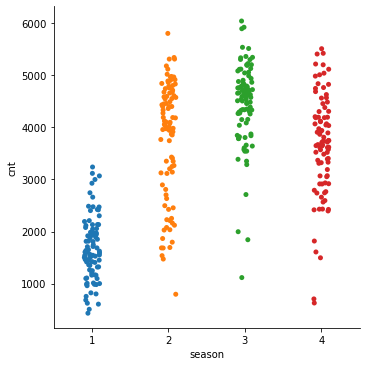

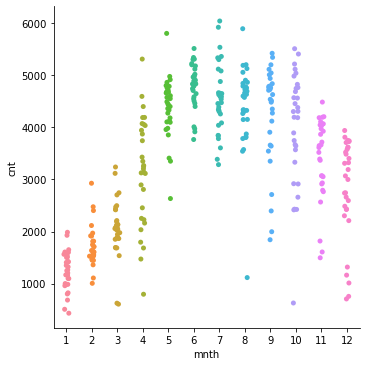

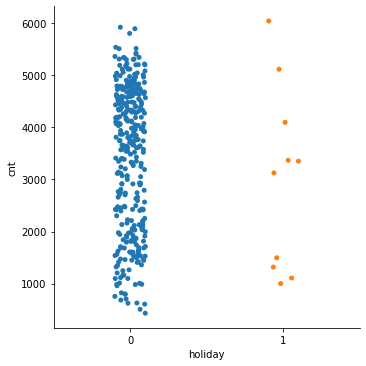

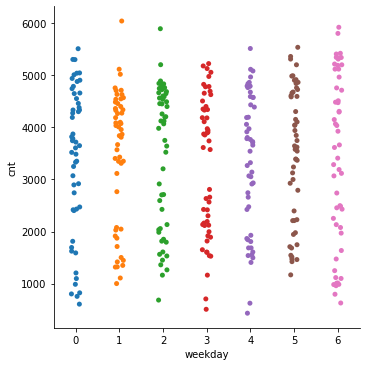

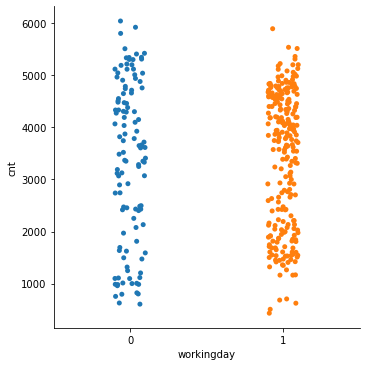

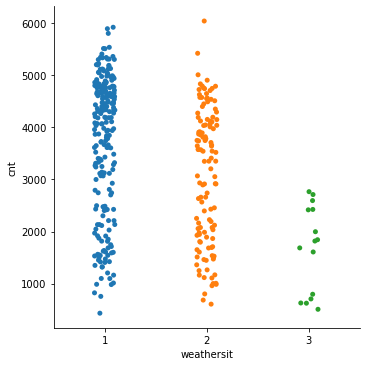

In [22]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=dataset_train)

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = dataset_train).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    2.031156e+08    1.0  150.830109  3.121329e-29
Residual  4.888345e+08  363.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      1.367816e+08    1.0  89.435421  4.060115e-19
Residual  5.551684e+08  363.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.674497e+06    1.0  0.880579  0.348667
Residual  6.902756e+08  363.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.337360e+04    1.0  0.007016  0.933292
Residual  6.919367e+08  363.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  2.953899e+05    1.0  0.155029  0.694006
Residual    6.916547e+08  363.0       NaN       NaN
                  sum_sq     df          F        PR(>F)
weathersit  7.009360e+07    1.0  40.916157  4.898884e-10
Residual    6.218565e+08  363.0        NaN           NaN


In [24]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [25]:
dataset_train.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.646700,0.188134,3405.761644
std,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.142852,0.071625,1378.753666
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.302174,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.540833,0.135583,2132.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647917,0.185642,3740.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.232970,4586.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.375617,6043.000000


In [26]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X

array([[ 1.      ,  1.      ,  0.      , ...,  0.363625,  0.805833,
         0.160446],
       [ 1.      ,  1.      ,  0.      , ...,  0.353739,  0.696087,
         0.248539],
       [ 1.      ,  1.      ,  0.      , ...,  0.189405,  0.437273,
         0.248309],
       ...,
       [ 1.      , 12.      ,  0.      , ...,  0.263892,  0.574167,
         0.119412],
       [ 1.      , 12.      ,  0.      , ...,  0.318812,  0.636667,
         0.134337],
       [ 1.      , 12.      ,  0.      , ...,  0.414121,  0.615833,
         0.220154]])

In [29]:
len(y_train)

292

In [30]:
len(X_test)

73

In [31]:
len(y_test)

73

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [34]:
y_pred

array([3608.61, 4310.74, 1824.7 ,  647.16, 2289.99, 3506.25, 2124.28,
       4120.66, 4459.33, 1517.55, 3334.09, 4580.28, 4148.71, 3829.38,
       3033.29, 4444.01, 4235.64, 2585.07, 4753.29, 5410.22, 4196.17,
       4455.28, 1914.92, 4111.14, 3446.9 , 4722.99, 1224.5 , 2957.56,
       3974.58, 4175.22, 4188.77, 2220.89, 1228.89, 1758.06, 1768.78,
       1537.87, 2116.46, 3983.08, 4186.43,  879.76, 4564.69, 3673.26,
       4400.83, 4340.5 , 1443.13, 3917.02, 4687.97, 3914.73, 4708.04,
       1801.14, 4590.81, 4468.72, 4999.89, 4932.4 , 2902.66, 1504.55,
       1500.43, 4177.26, 1362.76, 3342.51, 2766.52, 4027.51,  992.74,
       3568.08, 2263.62, 3611.45, 1842.27, 4191.69, 4389.06, 3990.18,
       2116.92, 4199.67, 4013.13])

In [35]:
dataset_test=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\test.csv")
dataset_test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [36]:
X2 = dataset_test.iloc[:, 1:].values

In [37]:
len(X2)

366

In [38]:
y2_pred = regressor.predict(X2)
np.set_printoptions(precision=2)

In [39]:
y2_pred

array([1283.68, 1240.03, 1362.56, 1409.72, 1843.07, 1807.  , 1473.91,
       1459.27, 1199.27, 1755.85, 1204.59, 1342.12, 1727.38, 1062.98,
        979.54, 1056.64, 1296.13, 1749.35, 1427.57, 1603.  ,  842.61,
        810.15,  921.22, 1221.35, 1730.48, 1387.45, 1749.29, 1407.42,
       1348.15, 1793.17, 1825.09, 3335.2 , 1829.41, 1826.85, 1625.71,
       1465.85, 1754.76, 1998.77, 1701.35, 1809.94, 1860.51, 1168.69,
       1354.1 , 1686.35, 1923.77, 1988.  , 1848.19, 1913.14, 1910.3 ,
       1654.28, 1644.79, 1756.49, 1938.14, 2794.9 , 2137.16, 1716.09,
       1785.25, 1950.75, 1976.65, 1730.32, 3362.62, 2066.18, 2424.47,
       1915.69, 1819.37, 1918.12, 2016.15, 2965.85, 1904.56, 2071.51,
       2308.18, 3417.14, 3550.27, 3428.81, 3397.35, 2754.77, 3566.39,
       3391.65, 3295.34, 3400.21, 3543.21, 3570.12, 3916.38, 3412.4 ,
       2573.85, 2872.2 , 2236.48, 3480.61, 3506.17, 2215.53, 2481.53,
       2672.43, 3069.45, 3605.01, 3635.63, 3105.44, 2693.2 , 3204.8 ,
       3661.35, 3411

In [40]:
submission=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\sample_submission.csv")
submission.head()

,id,cnt
0,366,2324.704634
1,367,1825.998871
2,368,1246.661929
3,369,1067.359745
4,370,2349.727614


In [41]:
df=pd.DataFrame(submission)


In [42]:
df['cnt']=y2_pred

In [43]:
df

,id,cnt
0,366,1283.68
1,367,1240.03
2,368,1362.56
3,369,1409.72
4,370,1843.07
...,...,...
361,727,1821.62
362,728,2004.67
363,729,1805.81
364,730,1705.68


In [45]:
print(df.to_string(index=False))

  id      cnt
 366  1283.68
 367  1240.03
 368  1362.56
 369  1409.72
 370  1843.07
 371  1807.00
 372  1473.91
 373  1459.27
 374  1199.27
 375  1755.85
 376  1204.59
 377  1342.12
 378  1727.38
 379  1062.98
 380   979.54
 381  1056.64
 382  1296.13
 383  1749.35
 384  1427.57
 385  1603.00
 386   842.61
 387   810.15
 388   921.22
 389  1221.35
 390  1730.48
 391  1387.45
 392  1749.29
 393  1407.42
 394  1348.15
 395  1793.17
 396  1825.09
 397  3335.20
 398  1829.41
 399  1826.85
 400  1625.71
 401  1465.85
 402  1754.76
 403  1998.77
 404  1701.35
 405  1809.94
 406  1860.51
 407  1168.69
 408  1354.10
 409  1686.35
 410  1923.77
 411  1988.00
 412  1848.19
 413  1913.14
 414  1910.30
 415  1654.28
 416  1644.79
 417  1756.49
 418  1938.14
 419  2794.90
 420  2137.16
 421  1716.09
 422  1785.25
 423  1950.75
 424  1976.65
 425  1730.32
 426  3362.62
 427  2066.18
 428  2424.47
 429  1915.69
 430  1819.37
 431  1918.12
 432  2016.15
 433  2965.85
 434  1904.56
 435  2071.51
 436  

In [46]:
df.to_csv('C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\new_RandomForest_submission1.csv',index=False)